In [4]:
import quandl
import pandas as pd
import json

#https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv?api_key=YOURAPIKEY
quandl.ApiConfig.api_key = "5zVMFDQCasREWkX37AQG"    
dataset_data = quandl.Dataset('WIKI/AAPL').data(params={ 'start_date':'2017-01-01', 'end_date':'2018-01-01', 'collapse':'annual', 'transformation':'rdiff', 'rows':4 })



In [3]:
import quandl
data = quandl.get('WIKI/APL', start_date='2010-01-01', end_date='2014-01-01',
                  collapse='month', transformation='rdiff',
                  rows=4)
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-05,0.042042,0.074357,0.049392,0.069297,0.512562,None,0.0,0.042042,0.074357,0.049392,0.069297,0.512562
2010-01-06,0.068204,0.070985,0.069231,0.064806,0.186729,None,0.0,0.068204,0.070985,0.069231,0.064806,0.186729
2010-01-07,0.075540,0.006628,0.020683,-0.000845,-0.265421,None,0.0,0.075540,0.006628,0.020683,-0.000845,-0.265421
2010-01-08,-0.010033,-0.012346,0.015859,0.014382,-0.391475,None,0.0,-0.010033,-0.012346,0.015859,0.014382,-0.391475


In [27]:
data_list = []
cursor_id = None
while True:
    data = quandl.Datatable('ZACKS/FC').data(params={'ticker': ['AAPL','MSFT'], 'per_end_date': {'gte': '2015-01-01'}, 'qopts': {'columns': ['ticker', 'comp_name'], 'cursor_id': cursor_id}})
    cursor_id = data.meta['next_cursor_id']
    data_list.append(data)
    if cursor_id is None:
        break
        
data_list.head()

AttributeError: 'list' object has no attribute 'head'

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


csvpath = os.path.join('NASDAQOMX-COMP (1).csv')


In [8]:
NASDAQ = pd.read_csv('NASDAQOMX-COMP (1).csv')

NASDAQ.head()

NASDAQ.index

RangeIndex(start=0, stop=3830, step=1)

In [9]:
newFrame = NASDAQ.reset_index()
newFrame.head()

,index,Trade Date,Index Value,High,Low,Total Market Value,Dividend Market Value
0,0,2018-04-10,7094.30,7117.98,7014.88,1.079392e+13,0.000000e+00
1,1,2018-04-09,6950.34,7074.95,6944.96,1.057449e+13,1.323016e+08
2,2,2018-04-06,6915.11,7066.64,6877.76,1.052083e+13,2.702212e+07
3,3,2018-04-05,7076.55,7112.38,7036.62,1.077047e+13,1.548576e+08
4,4,2018-04-04,7042.11,7059.29,6811.77,1.071804e+13,1.617338e+09


In [10]:
newFrame.columns

Index(['index', 'Trade Date', 'Index Value', 'High', 'Low',
       'Total Market Value', 'Dividend Market Value'],
      dtype='object')

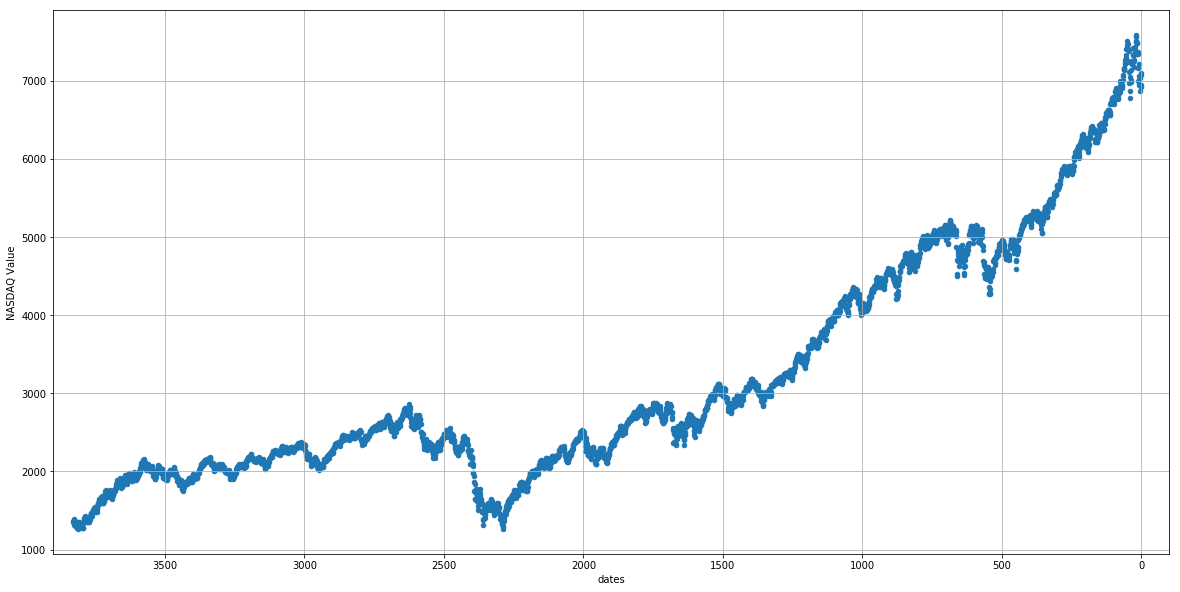

In [11]:

newFrame.plot(kind="scatter", x="index", y="Index Value", grid=True, figsize=(20,10),
              title="")
plt.xlabel("dates")
plt.ylabel("NASDAQ Value")
plt.xlim(3900,-100)
plt.show()